*Contenuti*
===
- [La libreria NumPy](#La-libreria-NumPy)
    - [Gli array](#Gli-array)
    - [Costruzione](#Costruzione)
    - [Accesso ai singoli elementi](#Accesso-ai-singoli-elementi)
    - [*shape*, *size* e *ndim*](#shape,-size-e-ndim)
        - [*Esercizio 1*](#Esercizio-1)
    - [Slicing e accesso a singole dimensioni](#Slicing-e-accesso-a-singole-dimensioni)
    - [Generazione di numeri casuali](#Generazione-di-numeri-casuali)
    - [Operazioni aggregate e *axes*](#Operazioni-aggregate-e-axes)
        - [*Esercizio 2*](#Esercizio-2)
        - [*Esercizio 3*](#Esercizio-3)
    - [*stack* e *split*](#stack-e-split)
    - [Aritmetica degli array](#Aritmetica-degli-array)
        - [*Esercizio 4*](#Esercizio-4)
    - [*Esercizio 5*](#Esercizio-5)
    - [*Esercizio 6*](#Esercizio-6)
    - [*Esercizio 7*](#Esercizio-7)

La libreria NumPy
===
Il calcolo vettoriale è molto usato nel machine learning. Lo standard Python per questo tipo di operazioni è *NumPy*. Questa libreria costituisce, insieme a *Jupyter* (sviluppo), *Pandas* (analisi e gestione dei dati), *Matplotlib* (visualizzazione), *Scikit-learn* (preprocessing e apprendimento) e *Keras* (reti neurali) l'ecosistema Python per la data science, sicuramente il più usato, supportato e flessibile al mondo.

A [questo link](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) c'è un estratto del *Python Data Science Handbook* dedicato a NumPy.

Per poter utilizzare NumPy lo *importiamo*: è infatti già disponibile nella distribuzione Anaconda.

In [1]:
import numpy as np
print(np.__version__)

1.16.3


Gli *array*
---
Per NumPy, ogni vettore o matrice è un *array*.

**Array**: *Insieme organizzato di elementi omogenei, identificati da uno stesso nome e da uno o più indici*.

Costruzione
---
Un array NumPy si può costruire in vari modi; per esempio, a partire da una lista Python.

In [2]:
python_lst = [3,7,2,0,6,2]
np_array = np.array(python_lst)
print(python_lst)
print(np_array)

[3, 7, 2, 0, 6, 2]
[3 7 2 0 6 2]


In [3]:
print(type(python_lst))
print(type(np_array))

<class 'list'>
<class 'numpy.ndarray'>


La funzione *full* genera un array con un numero assegnato di righe e colonne, e riempe tutte le sue posizioni con un singolo valore, anche questo assegnato.

**Nota**: NumPy tratta come array sia le matrici che i vettori (singola riga o colonna). Per comodità di lettura, anche se non è obbligatorio, chiameremo le (variabili che contengono le) matrici con la lettera maiuscola, mentre utilizzeremo la minuscola per i vettori.

In [7]:
A = np.full((5,3), 7)

A

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

Le funzioni *zeros* e *ones* sono casi particolari di full, e producono array rispettivamente di soli zero e uno.

In [5]:
np.zeros((5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
np.ones((2,7))

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

La funzione *arange* viene usata per generare numeri in un intervallo.

In [122]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Accesso ai singoli elementi
---
Come per le liste Python, si accede agli elementi di un array NumPy attraverso le parentesi quadre.

In [10]:
a = np.array([1,2,3,4,5,6,7,8])

a[0]

1

Per convenzione, nelle matrici il primo indice è quello delle righe.

In [257]:
A = np.array([[1,2,3,4],
              [5,6,7,8]])

A[0]

array([1, 2, 3, 4])

In [258]:
A[1][2]#elemento in posizione (colonna) 2 della riga 1

7

*shape*, *size* e *ndim*
---
Un array NumPy ha alcune proprietà legate alla sua struttura. 

Come abbiamo visto con full, zeros e ones, è possibile indicare il numero di righe e colonne di un array. La coppia di questi valori è detta *shape*, ed è una proprietà di ogni array.

In [264]:
A.shape

(2, 4)

Un array NumPy si può convenientemente rimodellare con la funzione *reshape*. Il nuovo numero di righe e colonne deve essere coerente con quello di partenza.

In [265]:
B = A.reshape(4,2)

B

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [266]:
B.shape

(4, 2)

In [267]:
C = B.reshape(3,3)

ValueError: cannot reshape array of size 8 into shape (3,3)

Il campo *size* indica quanti elementi sono contenuti in un array.

In [268]:
a = np.array([1,2,3,4,5,6,7,8])

a.size

8

In [269]:
B = a.reshape(4,2)

B.size

8

In [270]:
np.full((10,10), 0).size

100

Come abbiamo detto, per NumPy ogni oggetto vettoriale è trattato come un array. Questi possono avere un numero di dimensioni a piacere.

In matematica, un vettore è formato da una sola riga (o colonna), ed ha quindi una sola dimensione. Una matrice, che ha righe e colonne, ha due dimensioni. L'estensione di una matrice a più di due dimensioni è detta *tensore*.

Un filmato può essere rappresentato come un tensore: ogni frame che lo compone è una matrice di pixel, e ciascuno di essi è sistemato sulla terza dimensione, quella del tempo.

### *Esercizio 1*
In un'immagine a colori, ad ogni pixel sono associati 3 valori tra 0 e 255, rispettivamente per i rossi, i verdi e i blu. Quante dimensioni avrà il tensore che rappresenta un filmato a colori?

---

Attraverso il campo *ndim* si può accedere al numero di dimensioni di un array.

In [271]:
a = np.arange(24)#24 elementi

print(a)
print(a.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
1


In [272]:
B = a.reshape(6,4)#6 righe, ciascuna con 4 elementi

print(B)
print(B.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
2


In [273]:
C = a.reshape(3,2,4)#'3 matrici, ciascuna con 2 righe, ciascuna delle quali con 4 elementi'

print(C)
print(C.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]
3


Mentre ndim è il numero di dimensioni di un array, shape indica la *profondità* di ogni dimensione. Tornando all'esempio del filmato a colori, avremo
- ndim = 4: tempo, $x$, $y$, colori
- shape = (\# frame del filmato, \# pixel sulla $y$, \# pixel sulla $x$, 3 livelli di colore).

Slicing e accesso a singole dimensioni
---
NumPy prevede operazioni di slicing simili a quelle viste per le liste Python.

In [274]:
a = np.arange(10)

print(a[:3])
print(a[3:])

[0 1 2]
[3 4 5 6 7 8 9]


Si può accedere ad intervalli o gruppi di singole righe e colonne con una sintassi molto compatta. Il simbolo ':' indica tutti gli elementi lungo una dimensione.

In [275]:
A = np.arange(48).reshape(6,8)

A

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [276]:
A[:,0]#(tutte le righe,) la prima colonna

array([ 0,  8, 16, 24, 32, 40])

In [277]:
A[:,-1]#(tutte le righe,) l'ultima colonna

array([ 7, 15, 23, 31, 39, 47])

In [278]:
A[0,:]#la prima riga (, tutte le colonne) 

array([0, 1, 2, 3, 4, 5, 6, 7])

In [280]:
A[1:4, -1]#righe dalla prima (esclusa) alla quarta (inclusa), ultima colonna

array([15, 23, 31])

In [281]:
rows_to_keep = [1,2,-1]

A[rows_to_keep, :]#righe con indici selezionati, tutte le colonne

array([[ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [282]:
A[rows_to_keep, 2:5]#righe con indici selezionati, intervallo di colonne

array([[10, 11, 12],
       [18, 19, 20],
       [42, 43, 44]])

In [283]:
cols_to_keep = [3,5]

A[:, cols_to_keep]#tutte le righe, colonne con indici selezionati 

array([[ 3,  5],
       [11, 13],
       [19, 21],
       [27, 29],
       [35, 37],
       [43, 45]])

Anche una singola immagine RGB è un tensore. Vediamo un esempio di elaborazione immagini con NumPy.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('data/trump.jpg')
plt.imshow(image)

In [3]:
np_img = np.array(image)

print('shape:', np_img.shape)
print('ndim : ', np_img.ndim)
print('size : ', np_img.size)#cosa indica?

shape: (356, 628, 3)
ndim:  3
size:  670704


In [8]:
reds = np_img[:, :, 0]
greens = np_img[:, :, 1]
blues = np_img[:, :, 2]

print(reds.shape, greens.shape, blues.shape)

(356, 628) (356, 628) (356, 628)


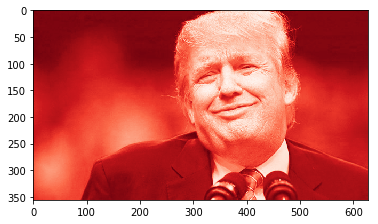

In [9]:
plt.imshow(reds, cmap=plt.cm.Reds_r)

Generazione di numeri casuali
---
Il modulo *random* gestisce la generazione di (array di numeri) casuali da vari tipi di distribuzione statistica: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html.

Vediamo alcuni esempi.

In [314]:
import numpy.random as rdm

a = rdm.random()#uniforme continua in [0.0, 1.0)

a

0.878452190276042

In [315]:
A = rdm.random((5,5))#uniforme continua in [0.0, 1.0), shape assegnata

A

array([[0.10286336, 0.09237389, 0.35404666, 0.55181626, 0.03362509],
       [0.96896177, 0.32099724, 0.22126269, 0.1412639 , 0.09725993],
       [0.98404224, 0.26034093, 0.53702252, 0.44792617, 0.09956909],
       [0.35231166, 0.46924917, 0.84114013, 0.90464774, 0.03755938],
       [0.50831545, 0.16684751, 0.77905102, 0.8649333 , 0.41139672]])

In [316]:
B = rdm.randint(0, 10, (4,5))#uniforme discreta in [0,10), shape assegnata

B

array([[3, 3, 7, 9, 9],
       [9, 7, 3, 2, 3],
       [9, 7, 7, 5, 1],
       [2, 2, 8, 1, 5]])

In [317]:
C = rdm.normal(3, 1, (4,5))#normale con media 3 e deviazione standard 1, shape assegnata

C

array([[2.36415392, 3.67643329, 3.57659082, 2.79170124, 3.39600671],
       [1.90693849, 1.50874241, 3.4393917 , 3.1666735 , 3.63503144],
       [5.38314477, 3.94447949, 2.08717777, 4.11701629, 1.68409259],
       [2.5384154 , 2.93175839, 4.71334272, 2.25524518, 2.17356146]])

Operazioni aggregate e *axes*
---
Quando si ha a che fare con grandi quantità di dati, l'estrazione di statistiche globali descrittive è una delle prime possibili analisi. Vediamo qualche *operazione aggregata* sugli array NumPy.

La somma di tutti gli elementi di un array si ottiene con la funzione *sum*.

In [318]:
a = rdm.normal(0, 1, (50,))

a

array([-0.09845252, -0.66347829,  1.12663592, -1.07993151, -1.14746865,
       -0.43782004, -0.49803245,  1.92953205,  0.94942081,  0.08755124,
       -1.22543552,  0.84436298, -1.00021535, -1.5447711 ,  1.18802979,
        0.31694261,  0.92085882,  0.31872765,  0.85683061, -0.65102559,
       -1.03424284,  0.68159452, -0.80340966, -0.68954978, -0.4555325 ,
        0.01747916, -0.35399391, -1.37495129, -0.6436184 , -2.22340315,
        0.62523145, -1.60205766, -1.10438334,  0.05216508, -0.739563  ,
        1.5430146 , -1.29285691,  0.26705087, -0.03928282, -1.1680935 ,
        0.52327666, -0.17154633,  0.77179055,  0.82350415,  2.16323595,
        1.33652795, -0.36918184, -0.23937918,  1.0996596 ,  0.65526373])

In [320]:
np.sum(a)

-3.5529903771838516

In [321]:
sum(a)

-3.5529903771838542

Quando le dimensioni degli array sono grandi, le operazioni aggregate di NumPy sono molto più efficienti di quelle default di Python.

In [322]:
np.mean(a)

-0.07105980754367704

### Esercizio 2
Senza costrutti NumPy, scrivere un'implementazione della *deviazione standard*,

$$\sigma := \sqrt{\frac{1}{n}\sum_{i=1}^n{(x_i - \bar{x}_i)^2}},$$


e confrontare risultati con l'equivalente NumPy, *std*.

In [ ]:
import numpy as np
from math import sqrt

def py_std(x):
    #FILL ME

#FILL ME

Le funzioni aggregate di NumPy possono essere utilizzate su ognuno degli *axes* di un array. Ogni axis corrisponde ad una dimensione; il numero di axes è quindi pari al valore del campo ndim.

Un array monodimensionale avrà solo l'*axis 0*, uno bidimensionale gli axes 0 e 1, e così via.

Vediamo come usare le funzioni aggregate lungo gli axes di un array NumPy.

In [323]:
A = np.random.randint(0, 5, (3,5))

A

array([[0, 0, 0, 1, 0],
       [3, 1, 4, 1, 2],
       [4, 0, 0, 2, 0]])

In [324]:
np.sum(A)

18

In [325]:
np.sum(A, axis=0)#somma 'lungo le righe' --> genero una riga

array([7, 1, 4, 4, 2])

In [326]:
np.sum(A, axis=1)#somma 'lungo le colonne' --> genero una colonna

array([ 1, 11,  6])

In [328]:
np.mean(A, axis=1)

array([0.2, 2.2, 1.2])

### *Esercizio 3*

Riprendiamo l'esempio del filmato come tensore, e immaginiamo di rappresentare ogni frame come una griglia di pixel in scala di grigio: ciascuno di essi avrà un valore intero da 0 a 255, che ne indica l'intensità.
Supponiamo inoltre che il filmato contenga 50 frame e che ciascuno di questi sia 5x5 pixel.

- rappresentare un filmato (generare numeri casuali per i valori dei pixel) tramite un array NumPy
- calcolare il valore medio di intensità (sui frame del filmato) dei singoli pixel

In [ ]:
#FILL ME

*stack* e *split*
---
Array NumPy con una profondità e un numero coerente di dimensioni possono essere combinati tra loro.

Le funzioni *hstack* e *vstack* prendono in ingresso una lista di array e li affiancano orizzontalmente (h) o verticalmente (v).

In [184]:
A = np.arange(16).reshape(4,4)

A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [185]:
B = np.arange(16,32).reshape(4,4)

B

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [187]:
C = np.hstack([A,B])

C

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [188]:
D = np.vstack([A,B])

D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

Le funzioni *hsplit* e *vsplit* realizzano l'operazione inversa alla concatenazione: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.split.html.

Aritmetica degli array
---

Il punto di forza di NumPy è la possibilità di fare operazioni vettoriali in modo efficiente (e intuitivo). Per saperne di più: https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html.

Calcoliamo i *reciproci* $\frac{1}{x}$ degli elementi di un array utilizzando una comprensione (Lezione 3).

In [330]:
values = [4, 4, 5, 2, 5]
reciprocals = [1/x for x in values]

print('valori originali:', values)
print('valori reciproci:', reciprocals)

valori originali: [4, 4, 5, 2, 5]
valori reciproci: [0.25, 0.25, 0.2, 0.5, 0.2]


Facciamo la stessa cosa con l'artimetica degli array di NumPy.

In [331]:
values = np.array(values)
np_reciprocals = 1/values

print('valori originali:', values)
print('valori reciproci:', np_reciprocals)

valori originali: [4 4 5 2 5]
valori reciproci: [0.25 0.25 0.2  0.5  0.2 ]


Tutte le operazioni aritmetiche fondamentali possono essere usate sugli array NumPy.

In [87]:
a = np.arange(10)
print('a:', a)
print('\na + 5:', a + 5)
print('\na - 5:', a - 5)
print('\na * 2:', a * 2)
print('\na / 2:', a / 2)

a: [0 1 2 3 4 5 6 7 8 9]

a + 5: [ 5  6  7  8  9 10 11 12 13 14]

a - 5: [-5 -4 -3 -2 -1  0  1  2  3  4]

a * 2: [ 0  2  4  6  8 10 12 14 16 18]

a / 2: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


L'aritmetica funziona anche per array con più dimensioni.

In [217]:
A = np.arange(20).reshape(5,4)

A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [218]:
A / 2

array([[0. , 0.5, 1. , 1.5],
       [2. , 2.5, 3. , 3.5],
       [4. , 4.5, 5. , 5.5],
       [6. , 6.5, 7. , 7.5],
       [8. , 8.5, 9. , 9.5]])

In [220]:
- A

array([[  0,  -1,  -2,  -3],
       [ -4,  -5,  -6,  -7],
       [ -8,  -9, -10, -11],
       [-12, -13, -14, -15],
       [-16, -17, -18, -19]])

### *Esercizio 4*

- generare un array di numeri distribuiti normalmente con media 5 e deviazione standard 3
- sottrarre 5 a tutti gli elementi dell'array
- calcolare la deviazione standard degli elementi dell'array utilizzando le funzioni NumPy mean, sum e sqrt e l'aritmetica degli array
- controllare che il risultato sia (vicino a 3 e) uguale a quello ottenuto con la funzione NumPy std

In [91]:
#FILL ME

*Esercizio 5*
---

Rappresentare attraverso array NumPy i dati del primo esempio di classificazione con KNN che trovate sulle slide. Calcolate le distanze euclidee tra $x^{new}$ e ciascun esempio in $X^{train}$.

In [ ]:
#FILL ME

*Esercizio 6*
---
Rappresentare attraverso array NumPy i dati del secondo esempio di classificazione KNN delle slide. Ripetere l'analisi, calcolando le distanze tra $d(A,B)$ e $d(A,C)$ prima e dopo la scalatura delle feature tra 0 e 1. 

In [1]:
#FILL ME

*Esercizio 7*
---
Implementare il modello $k$-nearest neighbors (KNN) per la classificazione. In particolare, costruire una funzione che
- utilizza operazioni aggregate e vettoriali di NumPy
- prende in ingresso
 * un intero $k$
 * un array bidimensionale di esempi $X_{train}$ (per comodità, generare numeri casuali tra 0 e 1)
 * un array di etichette $y_{train}$ (interi, 0 o 1)
 * un nuovo esempio da classificare $x_{new}$ (sempre tra 0 e 1)
- predice la classe di $x_{new}$ restituendo la più frequente tra le etichette (una qualsiasi in caso di pareggio) dei $K$ esempi di $X_{train}$ più vicini a $x_{new}$.

**Qualche consiglio**:
1. Il costrutto
        np.argmax(np.bincount(x))
   dove *x* è un array di interi, restituisce l'elemento più frequente tra quelli di x
2. Dare un occhio alla funzione *argsort*: https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing.

In [221]:
#FILL ME

print(np.argmax(np.bincount([1,1,0,0,0,0,1,0])))
print(np.argsort([4,1,0,2,3]))#indici che ordinerebbero l'array

0
[2 1 3 4 0]


<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>